In [0]:
import os
from os.path import dirname, abspath

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.regularizers import l2
from keras import backend as K
import matplotlib.pyplot as plt

In [0]:
# __file__ = "cnn.txt"

PROJECT_DIR = abspath('')
PLOTS_DIR = os.path.join(PROJECT_DIR, "plots")
if not os.path.exists(PLOTS_DIR):
    os.makedirs(PLOTS_DIR)

In [0]:
img_rows, img_cols = 28, 28
epochs = 12
batch_size = 128
num_classes = 10

(x_train, y_train), (x_test, y_test) = mnist.load_data()
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     x_train = x_train[1:10]
#     x_test = x_test[1:10]
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
#     x_train = x_train[1:10]
#     x_test = x_test[1:10]
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
def create_model(no_of_layers,no_of_kernels,kernel_size,dense,dropout,active_func='relu',l2_reg =0.0):
    model = Sequential()
    model.add(Conv2D(no_of_kernels[0], (kernel_size[0],kernel_size[0]),
                     activation=active_func,
                     input_shape=input_shape, kernel_regularizer=l2(l2_reg)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    if no_of_layers > 1:
        for i in range(1,no_of_layers):
            model.add(Conv2D(no_of_kernels[i], (kernel_size[i],kernel_size[i]), activation=active_func, kernel_regularizer=l2(l2_reg)))
            model.add(MaxPooling2D(pool_size=(2, 2)))
    if dropout:
        model.add(Dropout(0.25))
    model.add(Flatten())
    if dense:
        model.add(Dense(128, activation=active_func))
        if dropout:
            model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model
    

In [0]:
def evaluate(model,optimizer_func='adadelta'):
    model.summary()
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=optimizer_func,
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_split =0.1)
    
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    return history, score

In [0]:
def test_no_of_layers(plot_type='layers'):
    kernel_size = [3,3]
    no_of_kernels = [32,64]
    no_of_layers = [1,1,2]
    dense = False
    legend = []
    legstring = ['no','1','1']
    for i in range(3):
        model = create_model(no_of_layers[i],no_of_kernels,kernel_size,dense,False)
        dense = True
        h,s = evaluate(model)
        plt.plot(h.history['val_acc'])
        legend.append('{} Convolution layer, {} dense layer(Test accuracy - {})'.format(i+1,legstring[i],s[1]))

    plt.title('Model accuracy v/s Number of hidden layers')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(legend, loc='best')
    plt.savefig(PLOTS_DIR + '/accuracy_cnn_{}.png'.format(plot_type))
    plt.show()
    plt.close()

In [0]:
def test_activation_function(plot_type='activation'):
    kernel_size = [3,3]
    no_of_kernels = [32,64]
    dense=True
    active='relu'
    legend = []
    legstring= ['ReLU','Sigmoid','TanH']
    for i in range(3):
        model = create_model(1,no_of_kernels,kernel_size,dense,False,active_func=active)
        if i==0:
            active='sigmoid'
        if i==1:
            active = 'tanh'
        h,s = evaluate(model)
        plt.plot(h.history['val_acc'])
        legend.append('{}(Test accuracy - {})'.format(legstring[i],s[1]))

    plt.title('Model accuracy v/s Activation function')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(legend, loc='best')
    plt.savefig(PLOTS_DIR + '/accuracy_cnn_{}.png'.format(plot_type))
    plt.show()
    plt.close()

In [0]:
def test_kernel_size(plot_type='kernel_size'):
    kernel_size=[3,7,15]
    no_of_kernels = [32,64]
    dense = True
    legstring = ['3x3','7x7','15x15']
    legend = []
    for i in range(3):
        model = create_model(1,no_of_kernels,[kernel_size[i]]*2,dense,False)
        h,s = evaluate(model)
        plt.plot(h.history['val_acc'])
        legend.append('{} kernel size (Test accuracy - {})'.format(legstring[i],s[1]))
    
    plt.title('Model accuracy v/s kernel size')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(legend, loc='best')
    plt.savefig(PLOTS_DIR + '/accuracy_cnn_{}.png'.format(plot_type))
    plt.show()
    plt.close()

In [0]:
def test_no_of_kernels(plot_type = 'no_of_kernels'):
    kernel_size=[3,3]
    no_of_kernels = [32,64]
    dense = True
    legstring = ['20','40','60']
    legend = []
    for i in range(3):
        model = create_model(1,no_of_kernels,kernel_size,dense,False)
        h,s = evaluate(model)
        plt.plot(h.history['val_acc'])
        legend.append('{} kernels (Test accuracy - {})'.format(legstring[i],s[1]))

    plt.title('Model accuracy v/s no of kernels')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(legend, loc='best')
    plt.savefig(PLOTS_DIR + '/accuracy_cnn_{}.png'.format(plot_type))
    plt.show()
    plt.close()

In [0]:
def test_overfitting(plot_type = 'overfitting'):
    kernel_size=[3,3]
    no_of_kernels = [32,64]
    dense = True
    legend = []   
    epcoh = 40
    h1,s1 = evaluate(create_model(1,no_of_kernels,kernel_size,dense,False))
    h2,s2 = evaluate(create_model(1,no_of_kernels,kernel_size,dense,True))
    h3,s3 = evaluate(create_model(1,no_of_kernels,kernel_size,dense,False,l2_reg=0.01))
    plt.plot(h1.history['val_loss'])
    plt.plot(h2.history['val_loss'])
    plt.plot(h3.history['val_loss'])
    plt.title('Model loss in different overfitting techniques')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    legend1 = 'No mitigation strategy used(loss - {})'.format(s1[1])
    legend2 = 'Dropout mitigation strategy (loss- {})'.format(s2[1])
    legend3 = 'L2 regularization mitigation strategy (loss - {})'.format(s3[1])
    plt.legend([legend1,legend2,legend3], loc='best')
    plt.savefig(PLOTS_DIR + '/loss_cnn_{}.png'.format(plot_type))
    plt.show()
    epoch = 12
    plt.close()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_91 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_91 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_82 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_150 (Dense)            (None, 128)               692352    
_________________________________________________________________
dense_151 (Dense)            (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/12
54000/54000 [==============================] - 8s 150us/step - loss: 0.2614 

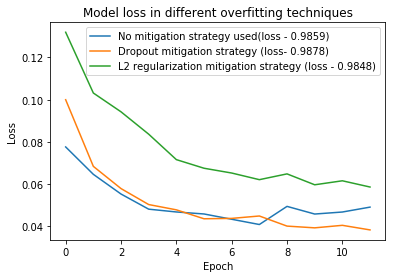

In [0]:
if __name__ == '__main__':
#     test_no_of_layers()
#     test_activation_function()
#     test_kernel_size()
#     test_no_of_kernels()
    test_overfitting()
    pass

In [0]:
def test_optimization():
    kernel_size = [3,3]
    no_of_kernels = [32,64]
    no_of_layers = [1,1,2]
    dense = False
    legend = []
    legstring = ['adadelta','adam','adagrad']
    optimizer = ['adadelta','adam','adagrad']
    for i in range(3):
        model = create_model(1,no_of_kernels,kernel_size,dense,False)
        dense = True
        h,s = evaluate(model,optimizer_func=optimizer[i])
        plt.plot(h.history['val_acc'])
        legend.append(' Optimizer {} (Test accuracy - {})'.format(legstring[i],s[1]))

    plt.title('Model accuracy v/s optimizers')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(legend, loc='best')
#     plt.savefig(PLOTS_DIR + '/accuracy_cnn_{}.png'.format(plot_type))
    plt.show()
    plt.close()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_79 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_70 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_127 (Dense)            (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/12
54000/54000 [==============================] - 7s 132us/step - loss: 0.3634 - acc: 0.8918 - val_loss: 0.1432 - val_acc: 0.9632
Epoch 2/12
54000/54000 [==============================] - 2s 41us/step - loss: 0.13

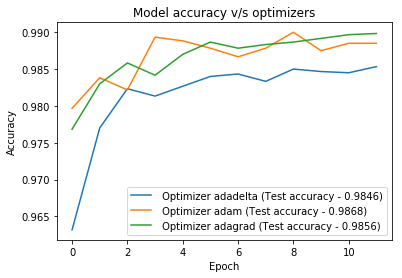

In [0]:
test_optimization()